<a href="https://colab.research.google.com/github/mardmikon/-Intelligent-systems-and-technologies/blob/main/%D0%9F%D1%80%D0%B5%D0%B4%D0%BE%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd

import umap
from sklearn.manifold import TSNE

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [ ]:
data_headers = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail", "word_freq_receive",
                "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", "word_freq_your", "word_freq_font",
                "word_freq_000", "word_freq_money", "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", "word_freq_telnet", "word_freq_857", "word_freq_data",
                "word_freq_415", "word_freq_85", "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct", "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project",
                "word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average", "capital_run_length_longest","capital_run_length_total"]
dataset = pd.read_csv('spambase.data', names=data_headers)
y = dataset.iloc[:,-1]

[Text(0.5, 1.0, '2D UMAP projection')]

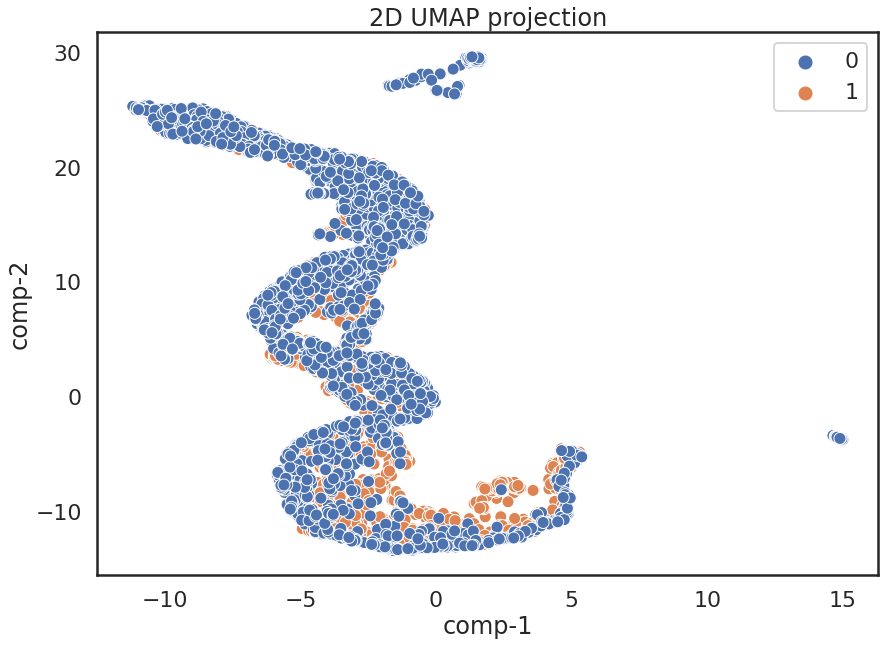

In [ ]:
embedding_UMAP = umap.UMAP( n_neighbors=100, min_dist=0.5, n_components=2).fit_transform(dataset)
df2 = pd.DataFrame()
df2["y"] = y
df2["comp-1"] = embedding_UMAP[:,0]
df2["comp-2"] = embedding_UMAP[:,1]
sns.set(style='white', context='poster', rc={'figure.figsize':(14,10)})
sns.scatterplot(x="comp-1", y="comp-2", hue=df2.y.tolist(), data=df2).set(title="2D UMAP projection") 

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 4601 samples in 0.041s...
[t-SNE] Computed neighbors for 4601 samples in 0.794s...
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.087425
[t-SNE] KL divergence after 1000 iterations: 0.438467


[Text(0.5, 1.0, '2D t-SNE projection')]

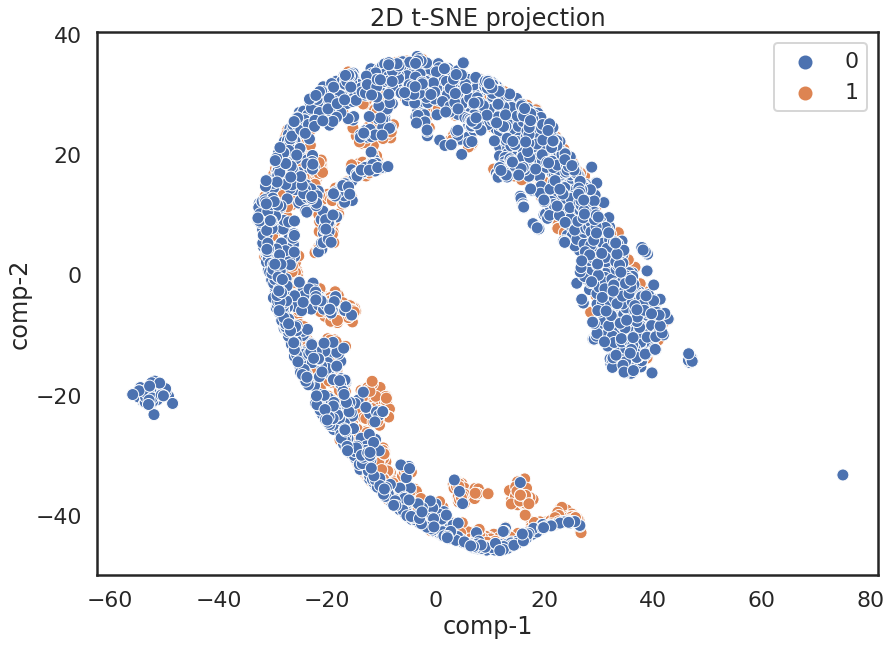

In [ ]:
embedding_TSNE = TSNE(perplexity=100, verbose=0.5, n_components = 2).fit_transform(dataset)
df2 = pd.DataFrame()
df2["y"] = y
df2["comp-1"] = embedding_TSNE[:,0]
df2["comp-2"] = embedding_TSNE[:,1]
sns.set(style='white', context='poster', rc={'figure.figsize':(14,10)})
sns.scatterplot(x="comp-1", y="comp-2", hue=df2.y.tolist(), data=df2).set(title="2D t-SNE projection") 

**n_neighbors** - количество ближайших соседей, по которым строится исходный многомерный граф. Низкие значения подтолкнут UMAP к большей сосредоточенности на локальной структуре, ограничивая количество соседних точек, учитываемых при анализе данных в больших измерениях, в то время как высокие значения подталкивают UMAP к представлению общей картины структура, теряя при этом мелкие детали.

**min_dist** - минимальное расстояние между точками в низкоразмерном пространстве. Этот параметр контролирует, насколько плотно UMAP объединяет точки вместе, при этом низкие значения приводят к более плотно упакованным вложениям.


In [ ]:
import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [ ]:
dataset = pd.read_csv('spambase.data', header=None)
X_full, y_full = dataset, dataset.iloc[:,-1]
feature_names = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail", "word_freq_receive",
                "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", "word_freq_your", "word_freq_font",
                "word_freq_000", "word_freq_money", "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", "word_freq_telnet", "word_freq_857", "word_freq_data",
                "word_freq_415", "word_freq_85", "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct", "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project",
                "word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average", "capital_run_length_longest","capital_run_length_total"]

feature_mapping = {
    "word_freq_make" : " ", 
    "word_freq_address" : " ", 
    "word_freq_all" : " ", 
    "word_freq_3d" : " ", 
    "word_freq_our" : " ", 
    "word_freq_over" : " ", 
    "word_freq_remove" : " ", 
    "word_freq_internet" : " ", 
    "word_freq_order" : " ", 
    "word_freq_mail" : " ", 
    "word_freq_receive" : " ",
    "word_freq_will" : " ", 
    "word_freq_people" : " ", 
    "word_freq_report" : " ", 
    "word_freq_addresses" : " ", 
    "word_freq_free" : " ", 
    "word_freq_business" : " ", 
    "word_freq_email" : " ", 
    "word_freq_you" : " ", 
    "word_freq_credit" : " ", 
    "word_freq_your" : " ", 
    "word_freq_font" : " ",
    "word_freq_000" : " ", 
    "word_freq_money" : " ", 
    "word_freq_hp" : " ", 
    "word_freq_hpl" : " ", 
    "word_freq_george" : " ", 
    "word_freq_650" : " ", 
    "word_freq_lab" : " ", 
    "word_freq_labs" : " ", 
    "word_freq_telnet" : " ", 
    "word_freq_857" : " ", 
    "word_freq_data" : " ",
    "word_freq_415" : " ", 
    "word_freq_85" : " ", 
    "word_freq_technology" : " ", 
    "word_freq_1999" : " ", 
    "word_freq_parts" : " ", 
    "word_freq_pm" : " ", 
    "word_freq_direct" : " ", 
    "word_freq_cs" : " ", 
    "word_freq_meeting" : " ", 
    "word_freq_original" : " ", 
    "word_freq_project" : " ",
    "word_freq_re" : " ", 
    "word_freq_edu" : " ", 
    "word_freq_table" : " ", 
    "word_freq_conference" : " ", 
    "char_freq_;" : " ", 
    "char_freq_(" : " ", 
    "char_freq_[" : " ", 
    "char_freq_!" : " ", 
    "char_freq_$" : " ", 
    "char_freq_#" : " ", 
    "capital_run_length_average" : " ", 
    "capital_run_length_longest" : " ",
    "capital_run_length_total" : " "
}

features = ['capital_run_length_average', 'capital_run_length_longest']
features_idx = [feature_names.index(feature)+1 for feature in features]
X = X_full.values[:, features_idx]

distributions = [
    ('Unscaled data', X),
    ('Data after standard scaling',
        StandardScaler().fit_transform(X)),
    ('Data after min-max scaling',
        MinMaxScaler().fit_transform(X)),
    ('Data after robust scaling',
        RobustScaler(quantile_range=(25, 75)).fit_transform(X))
]

y = minmax_scale(y_full)

# plasma does not exist in matplotlib < 1.5
cmap = getattr(cm, 'plasma_r', cm.hot_r)


def create_axes(title, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return ((ax_scatter, ax_histy, ax_histx),
            (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
            ax_colorbar)


def plot_distribution(axes, X, y, hist_nbins=50, title="",
                      x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cmap(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker='o', s=5, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(X[:, 1], bins=hist_nbins, orientation='horizontal',
                 color='grey', ec='grey')
    hist_X1.axis('off')

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(X[:, 0], bins=hist_nbins, orientation='vertical',
                 color='grey', ec='grey')
    hist_X0.axis('off')

In [ ]:
def make_plot(item_idx):
    title, X = distributions[item_idx]
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(axarr[0], X, y, hist_nbins=200,
                      x0_label=feature_mapping[features[0]],
                      x1_label=feature_mapping[features[1]],
                      title="Full data")

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = (
        np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) &
        np.all(X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1))
    plot_distribution(axarr[1], X[non_outliers_mask], y[non_outliers_mask],
                      hist_nbins=50,
                      x0_label=feature_mapping[features[0]],
                      x1_label=feature_mapping[features[1]],
                      title="Zoom-in")

    norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(ax_colorbar, cmap=cmap,
                              norm=norm, orientation='vertical',
                              label='Color mapping for values of y')

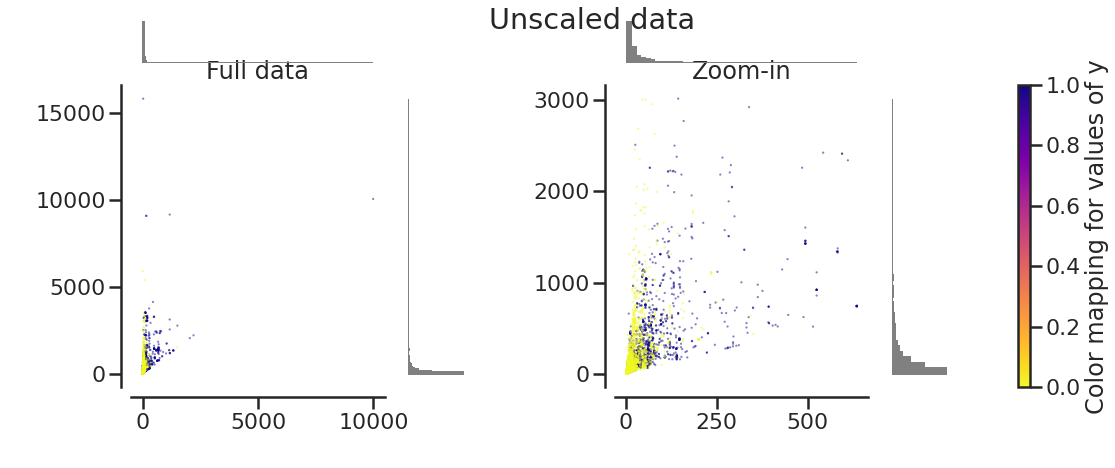

In [ ]:
make_plot(0)

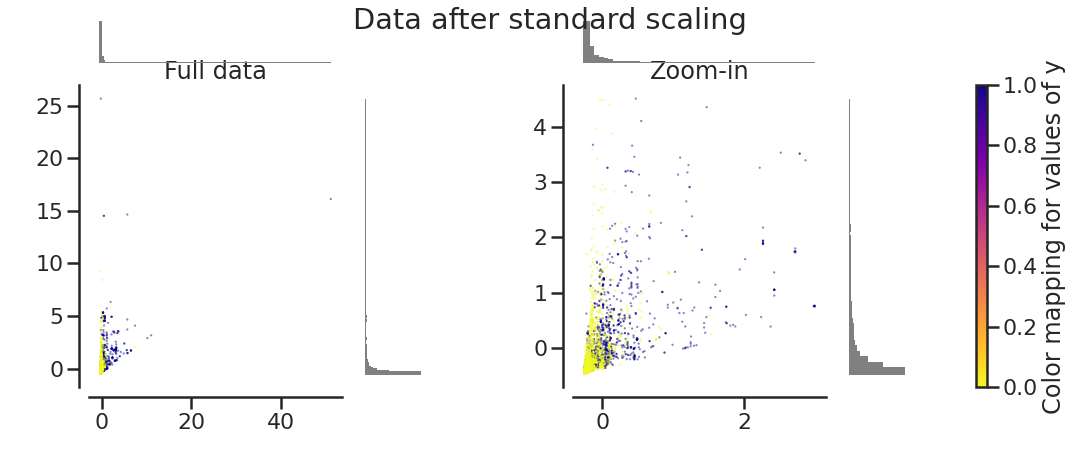

In [ ]:
make_plot(1)

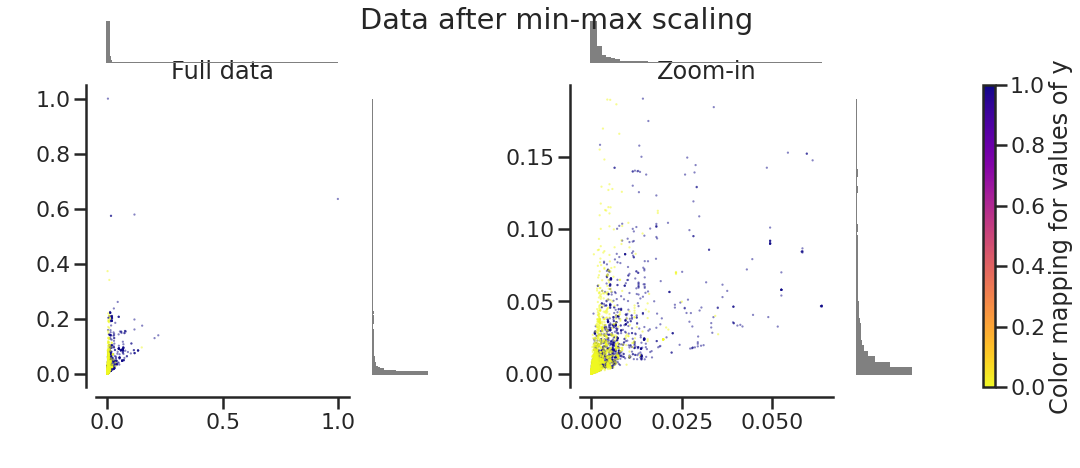

In [ ]:
make_plot(2)

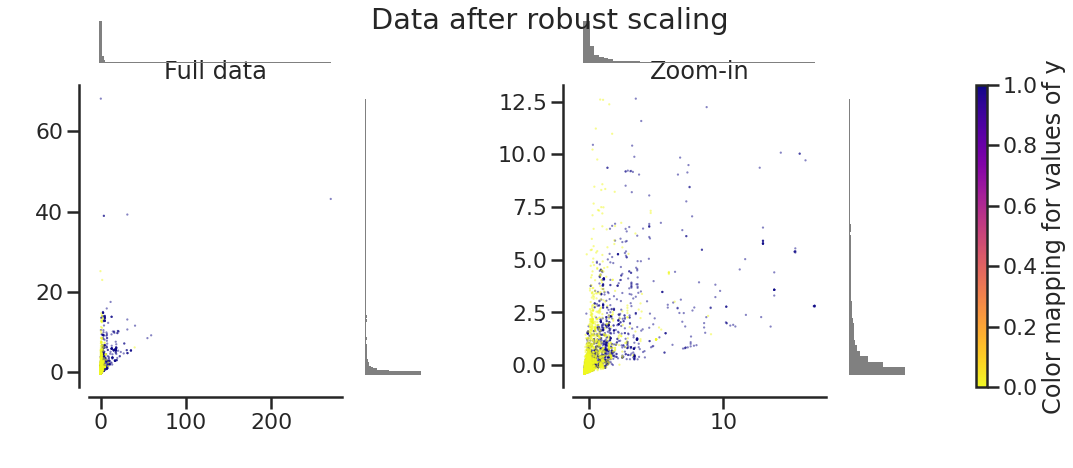

In [ ]:
make_plot(3)